%writefile
# Trees

https://stackoverflow.com/questions/5963954/fast-templated-c-octree-implementation

https://iq.opengenus.org/octree/


%%writefile notes.md
# Notes

## Quad-/Octree

[C++ octree implementation](https://stackoverflow.com/questions/5963954/fast-templated-c-octree-implementation)

[Octree basics](https://iq.opengenus.org/octree/)

## kd-Tree

[Rosetta Code kd-Tree implementation](https://rosettacode.org/wiki/K-d_tree)

k-d trees are not suitable, however, for efficiently finding the nearest neighbor in high dimensional spaces. As a general rule, if the dimensionality is k, the number of points in the data, N, should be $N \gg 2^k$. Otherwise, when k-d trees are used with high-dimensional data, most of the points in the tree will be evaluated and the efficiency is no better than exhaustive search, and other methods such as approximate nearest-neighbor are used instead.

Task: Construct a k-d tree and perform a nearest neighbor search for two example data sets:

    The Wikipedia example data of [(2,3), (5,4), (9,6), (4,7), (8,1), (7,2)].
    1000 3-d points uniformly distributed in a 3-d cube.

For the Wikipedia example, find the nearest neighbor to point (9, 2) For the random data, pick a random location and find the nearest neighbor.

In addition, instrument your code to count the number of nodes visited in the nearest neighbor search. Count a node as visited if any field of it is accessed.

Output should show the point searched for, the point found, the distance to the point, and the number of nodes visited.

There are variant algorithms for constructing the tree. You can use a simple median strategy or implement something more efficient. Variants of the nearest neighbor search include nearest N neighbors, approximate nearest neighbor, and range searches. You do not have to implement these. The requirement for this task is specifically the nearest single neighbor. Also there are algorithms for inserting, deleting, and balancing k-d trees. These are also not required for the task. 

## Dev Notes

- Look at Tests as examples more
    - MakeSphere: lsToDiskMesh (modified)
- lsTree will be 'similar' to lsToDiskMesh and lsMesh:
    - std::vector<std::array<T, 3>> nodes: coordinates of (surface) points
- The area/volume we want to partition is the bounding box around the original surface

## Fork

I forked the ViennaLS repo and created a branch for my fork called `lsTree`.

Remote looks as follows atm:

```
> git remote -v
origin  git@github.com:GenosW/ViennaLS.git (fetch)
origin  git@github.com:GenosW/ViennaLS.git (push)
upstream        git@github.com:ViennaTools/ViennaLS.git (fetch)
upstream        git@github.com:ViennaTools/ViennaLS.git (push)
```

### Synch changes from Main into my fork

1. Commit most recent local changes:
    - `git add .` 
    - `git commit -m "message"`
2. Pull from Upstream (main repo) to my local repo:
    - `git pull upstream master`
3. Deal with merge conflicts (should there be any).
4. Push local changes to my forks origin:
    - `git push origin`


## lsTree

### Iterator

node.start = 2, node.stop = 6
        .     .  
[0,1,5,7,2,7,0,1]
regionQuery(pt) --> itBeginRegion, itEndRegion
boundingBoxQuery(box) --> 4x itBeginRegion, itEndRegion
mesh->nodes() --> [0,1,5,7,2,7,0,1]

# Tree parameters

How do the Tree parameters (depth, size, number of bins, ...) change depending on how we want to bin the area/volume/mesh?

In [ ]:
import numpy as np

In [ ]:
def printParams():
    typ = "Quadtree" if D==2 else "Octree"
    print(f"{typ}")

    print(f"pts in {D}dim grid: {N_total}")
    print(f"d_l: {d_l}")
    print(f"Bins per dir: {B_dir}")

    print()
    print(f"Levels: {levels}")
    print(f"Number of bins: {N_bins}")

In [ ]:
D = 2 # Quadtree
D = 3 # Octree

# grid
d_l = 100
N_total = d_l**D
# bin: per dir
l_dir = 20
binsPerNode = 2**D
binPtsPerDir = d_l / l_dir

# Number of bins per dir
B_dir = d_l / ptsPerDir

# Number of levels
levels = np.log(B_dir) / np.log(binsPerNode)
N_bins = (2**D)**levels

printParams()

In [ ]:
np.log2(4)

In [ ]:
2.32**2

# Let's play this through

Example for D=2

In [ ]:
D = 2
binsPerLevel = 2**D
print("(Points per dir, points in grid)")
d_l, d_l**D

## L1
We now partition it in half ('BST' per dir) per direction.
In case of a 2D grid, we use a Quadtree and partition into 4 quadrants.

Current Tree:

```
root
| - NE 
| - NW 
| - SW
| - SE
```

Each quadrant represents a number of points (we will look at the points per dim for now).

Then we look in each quadrant, check wether they should be split again.

In [ ]:
print("(Current points per quadrant and dir , total per quadrant)")
quad_perDir = d_l / 2
quad_perDir, quad_perDir**D

In [ ]:
print("(Current points per quadrant and dir , total per quadrant)")
quad_perDir = d_l / 2
quad_perDir, quad_perDir**D

## L2
Let's focus on the NE quadrant for now:

In terms of x,y coordinates: (x > 0 && y > 0)

If we split this region in 4 quadrants again...

```
root [l0]
| - NE [l1](50x50)
    | - NE [l2] (25x25)=625
    | - NW [l2] (25x25)
    | - SW [l2] (25x25)
    | - SE [l2] (25x25)
.
.
.
```

In [ ]:
print("(Current points per quadrant and dir , total per quadrant)")
quad_perDir = quad_perDir / 2
quad_perDir, quad_perDir**D

If we do this for each original (l1-)quadrant, we'll have the following total number of bins:

In [ ]:
levels = 2
binsPerLevel ** levels

## L3
If we split each l2-quadrant again into 4 sub-quadrants again...

```
root [L0]
| - NE [L1](50x50)
    | - NE [L2] (25x25)=625
        | origin... center of NE [l2]
        | - NE [L3] (12x13)=156
        | - NW [L3] (12x13)
        | - SW [L3] (12x13)
        | - SE [L3] (12x13)
    | - NW [L2] (25x25)
        ...
    | - SW [L2] (25x25)
        ...
    | - SE [L2] (25x25)
        ...
.
.
.
```

In [ ]:
625 / 4

In [ ]:
np.sqrt(156.25)

In [ ]:
# 2 12x12 and 2 13x13
12**D * 2 + 13**D * 2 

In [ ]:
# 4 12x13
(12*13), (12*13) * 4

We could store the "origin" of the l3 quadrants (so the center of the l2 quadrant) as a point in the l2-quadrant node.

How does this affect the query?
- if corner of query-region is the origin of the level... all subquadrants

In [ ]:
levels = 3
binsPerLevel ** levels


## L4
If we split each l3-quadrant again into 4 sub-quadrants again...

```
root [L0]
| - NE [L1](50x50)
    | - NE [L2] (25x25)=625
        | origin... center of NE [l2]
        | - NE [L3] (12x13)=156
            | - NE [L4] (6x7)=36
            | - NW [L4] (6x7)
            | - SW [L4] (6x6)=42
            | - SE [L4] (6x6)
        | - NW [L3] (12x13)
        | - SW [L3] (12x13)
        | - SE [L3] (12x13)
        ...
.
.
.
```

In [ ]:
# 2 6x6 & 2 6x7
((6*6), (6*7)), 2*(6*6) + 2*(6*7)


This way, we'd have 4 unequally populated quadrants.

### Idea

Similar to how we stored the origin of the quadrant when we split L2, we could store an entire row here.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
N=10
points = np.random.randint(-10,10,size=(2,N))
points

In [ ]:
x, y = points
x

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x,y, ls="", marker="p", ms=4)
ax = plt.gca()
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
plt.grid(True);

In [ ]:
x_idx = np.argsort(x)
y_idx = np.argsort(y)

In [ ]:
x_idx, y_idx 

In [ ]:
def mysort(arr, N, indices):
    size_left = int(N/2)
    size_right = int(N - size_left)
    left = np.zeros(size_left)
    right = np.zeros(size_right)

    n = 0
    for idx, i in enumerate(indices):
        if i in arr:
            left[n] = i
            n += 1
            if n==size_left:
                offset = idx
                break
    n = 0
    for i in indices[offset+1:]:
        if i in arr:
            right[n] = i
            n += 1
            if n==size_right:
                break
    return left, right

In [ ]:
left_y = y_idx[:int(N/2)]
print("Sorting: ", left_y)
print("by: ", x_idx)
l1, r1 = mysort(left_y, N/2, x_idx)
l1, r1

In [ ]:
right_y = y_idx[int(N/2):]
print("Sorting: ", right_y)
print("by: ", x_idx)
l2, r2 = mysort(right_y, N/2, x_idx)
l2, r2

In [ ]:
plt.figure(figsize=(8,8))
for idx, (x_, y_) in enumerate(zip(x,y)):
    if idx in l1:
        color = "red"
    elif idx in r1:
        color = "green"
    elif idx in l2:
        color = "blue"
    elif idx in r2:
        color = "black"
    else:
        color = "yellow"
    plt.plot(x_,y_, ls="", marker="p", ms=4, color=color)
ax = plt.gca()
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
plt.grid(True);

The global ordering works, but then it doesn't really work well with the  way I've built the tree so far...

Works better if you build the tree level-by-level instead of building nodes till you reach a leaf.

In [ ]:
import numpy as np

In [ ]:
def findRoot(node):
    root = np.ceil(node/2) -1
    return int(root)


def getChildren(node):
    left = node*2 + 1
    right = node*2 + 2
    return int(left), int(right)

def nodeSize(level):
    return N/ 2**level

N = 56

In [ ]:
def generateTree(level=4):
    """Generate the edges needed to construct a kd-Tree with given number of levels. 

    Can be pasted into https://dreampuf.github.io/GraphvizOnline/
    """
    graph = []
    idx = 1
    for level in range(1,levels+1):
        for node in range(2**level):
            root = findRoot(idx)
            graph.append(f"{root}->{idx};")
            idx += 1
    dotGraph = '\n'.join(map(str, graph))
    print(dotGraph)
    return dotGraph

In [ ]:
generateTree(3);

In [ ]:
nodeSize(3)

In [ ]:
nodeSize(4)


In [ ]:
# L4
l0 = 1
l1 = 2
l2 = 4
l3 = 8
total = l0 + l1 + l2 + l3
total


In [ ]:
0, 1,1, 2,2,2,2, 3
0, 1,2, 3,4,5,6, 7

In [ ]:
A = np.matrix([
    [1,1,1,0],
    [1,0,0,0],
    [0,1,0,1],
    [0,0,1,1]
])
A

In [ ]:
np.linalg.det(A)

In [ ]:
def memory_of(array_size:int, prec:int = 64, dim="MB"):
    size = 3*8 * prec * array_size 
    if dim == "kB": 
        size /= 1e3
    elif dim == "MB": 
        size /= 1e6
    elif dim == "GB": 
        size /= 1e9
    else:
        return "wrong dim"
    return f"{size:.1g}" + dim

In [ ]:
memory_of(20000, dim="GB")

## Scratch pad

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cycler
import matplotlib as mpl

%matplotlib inline

def graph_points(bins:list, cmap):
  fig = plt.figure(figsize=(10,8))

  print("number of bins:", len(bins))
  print("min points per bin:", min([len(bucket) for bucket in bins]))
  print("max points per bin:", max([len(bucket) for bucket in bins]))
  N = sum([len(bucket) for bucket in bins])
  print("N: ", N)

  colors = cmap(np.linspace(0, 1, len(bins)))
  # colors = cmap.colors
  mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', colors)

  bucket_color = -15
  marker = "x"
  for idx, bucket in enumerate(bins):
    # if bucket_color > - 5 and bucket_color < 13:
    #   print(bucket)
    #   print(bucket_color)
    #   print("#"*30)
    xs = [pt[0] for pt in bucket]
    ys = [pt[1] for pt in bucket]
    plt.plot(xs, ys, ls="", marker=marker, label=f"bin{idx}(color={bucket_color})", ms=15)
    bucket_color += 2
    marker = "p" if marker=="x" else "x"

  
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)




In [2]:
import importlib
import testOutput.GridTree.meshes.sphere._2D_Tree as d2_tree
import testOutput.GridTree.meshes.sphere._2D_TreeDisk as d2_treedisk
importlib.reload(d2_tree)
importlib.reload(d2_treedisk)
bins = d2_tree.bins
bins = d2_treedisk.bins

number of bins: 16
min points per bin: 4
max points per bin: 4
N:  64


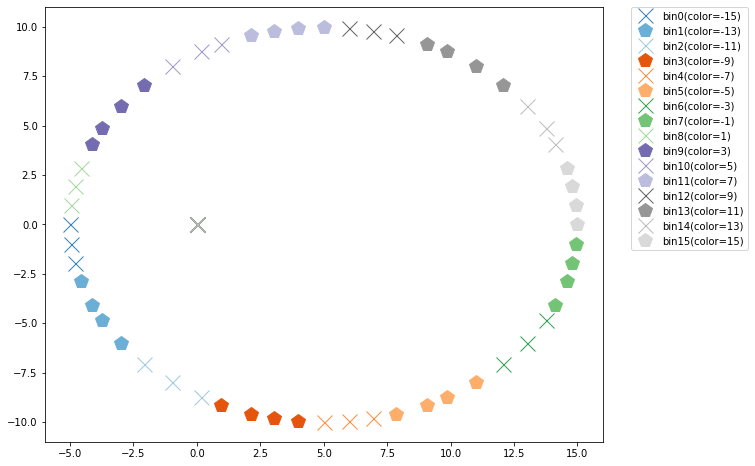

In [6]:

cmap = plt.get_cmap('seismic')
cmap = plt.get_cmap('tab20c')


graph_points(bins, cmap)

In [ ]:
ß